# Tracking through a simple lattice

In this example, we create a custom lattice and track a beam through it. We start with some imports.


In [1]:
import torch

from cheetah import (
    BPM,
    Drift,
    HorizontalCorrector,
    ParticleBeam,
    Segment,
    VerticalCorrector,
)

Lattices in _Cheetah_ are represented by `Segments`. A `Segment` is created as follows.


In [2]:
segment = Segment(
    elements=[
        BPM(name="BPM1SMATCH"),
        Drift(length=torch.tensor([1.0])),
        BPM(name="BPM6SMATCH"),
        Drift(length=torch.tensor([1.0])),
        VerticalCorrector(length=torch.tensor([0.3]), name="V7SMATCH"),
        Drift(length=torch.tensor([0.2])),
        HorizontalCorrector(length=torch.tensor([0.3]), name="H10SMATCH"),
        Drift(length=torch.tensor([7.0])),
        HorizontalCorrector(length=torch.tensor([0.3]), name="H12SMATCH"),
        Drift(length=torch.tensor([0.05])),
        BPM(name="BPM13SMATCH"),
    ]
)

**Note** that many values must be passed to lattice elements as `torch.Tensor`s. This is because _Cheetah_ uses automatic differentiation to compute the gradient of the beam position at the end of the lattice with respect to the element strengths. This is necessary for gradient-based magnet setting optimisation.

Named lattice elements (i.e. elements that were given a `name` keyword argument) can be accessed by name and their parameters changed like so.


In [3]:
segment.V7SMATCH.angle = torch.tensor([3.142e-3])

Next, we create a beam to track through the lattice. In this particular example, we import a beam from an Astra particle distribution file. Note that we are using a `ParticleBeam` here, which is a beam defined by individual particles. This is the most precise way to track a beam through a lattice, but also slower than the alternative `ParameterBeam` which is defined by the beam's parameters. Instead of importing beams from other simulation codes, you can also create beams from scratch, either using their parameters or their Twiss parameters.


In [4]:
incoming_beam = ParticleBeam.from_astra("../../tests/resources/ACHIP_EA1_2021.1351.001")

In order to track a beam through the segment, simply call the segment's `track` method.


In [5]:
outgoing_beam = segment.track(incoming_beam)

You may plot a segment with reference particle traces bay calling


ic| self.name: 'H10SMATCH', self.angle: tensor([0.])
ic| self.name: 'H10SMATCH', self.angle: tensor([0.])
ic| self.name: 'H12SMATCH', self.angle: tensor([0.])
ic| self.name: 'H12SMATCH', self.angle: tensor([0.])


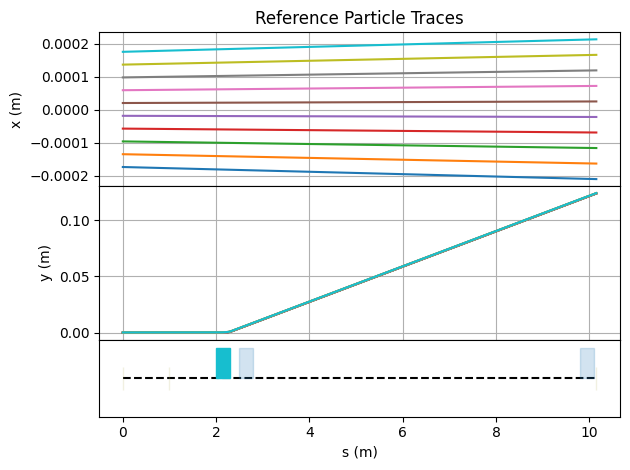

In [6]:
segment.plot_overview(beam=incoming_beam)

where the optional keyword argument `beam` is the incoming beam represented by the reference particles. Cheetah will use a default incoming beam, if no beam is passed.
